# Notebook to test the my datasets and my samplers classes

## Base Maxar Datasets

Creating a base Maxar dataset

In [2]:
from myGeoDatasets import Maxar
import os

#define some base root directories
root = os.path.join("/mnt/data2/vaschetti_data/maxar/Gambia-flooding-8-11-2022")
pre_root = os.path.join(root, "pre")
post_root = os.path.join(root, "post")

#indico un solo mosaico dell'evento (potrei includere anche più mosaici)
dataset = Maxar(os.path.join(pre_root, '10300100CFC9A500'))
print(dataset)

Maxar Dataset
    type: GeoDataset
    bbox: BoundingBox(minx=314843.75, maxx=335156.25, miny=1469843.75, maxy=1495156.25, mint=0.0, maxt=9.223372036854776e+18)
    size: 18


### Test MyRandomGeoSampler

In plot
Crs EPSG:32628
sx_low:  (319526.660971751, 1480085.2779811248)
dx_high:  (319831.836753001, 1480390.4537623748)


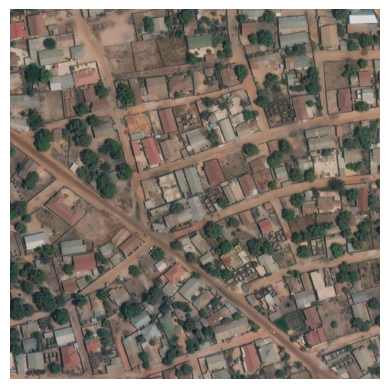

My sampler time:  0.5116171836853027


In [3]:
from mySamplers import MyRandomGeoSampler
from torchgeo.datasets import stack_samples, unbind_samples
from torch.utils.data import DataLoader
import time
from matplotlib import pyplot as plt

sampler = MyRandomGeoSampler(dataset, size=1000, length = 1, verbose = False)
dataloader = DataLoader(dataset, sampler=sampler, collate_fn=stack_samples)

start_my_samp_time = time.time()
for batch in dataloader:
    sample = unbind_samples(batch)[0]
    dataset.plot(sample)
    plt.axis("off")
    plt.show()
print('My sampler time: ', time.time() - start_my_samp_time)

### Test MyGridGeoSampler

Create a smaller Maxar dataset to reduce computation time

In [4]:
from mySamplers import MyGridGeoSampler

dataset = Maxar('/mnt/data2/vaschetti_data/maxar/Gambia-flooding-8-11-2022/pre/10300100CFC9A500/033133031213.tif')
sampler = MyGridGeoSampler(dataset, size=4000, stride=4000)
dataloader = DataLoader(dataset, sampler=sampler, collate_fn=stack_samples)

In sampler
tile_polygon:  POLYGON ((320156.25 1489843.75, 315455.322265625 1489843.75, 315470.63516642543 1492342.8892077415, 320156.25 1491748.5059546148, 320156.25 1489843.75))
In plot
Crs EPSG:32628
sx_low:  (314843.75, 1489843.75)
dx_high:  (316064.453125, 1491064.453125)


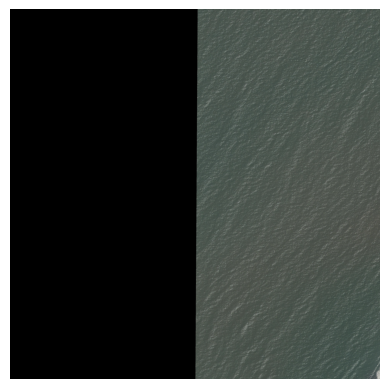

In plot
Crs EPSG:32628
sx_low:  (316064.453125, 1489843.75)
dx_high:  (317285.15625, 1491064.453125)


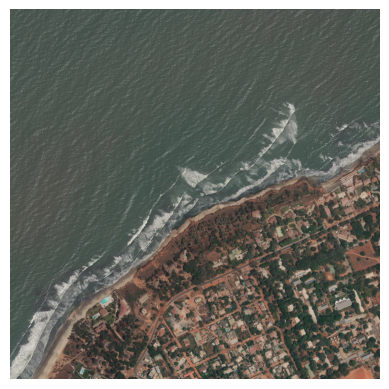

In plot
Crs EPSG:32628
sx_low:  (317285.15625, 1489843.75)
dx_high:  (318505.859375, 1491064.453125)


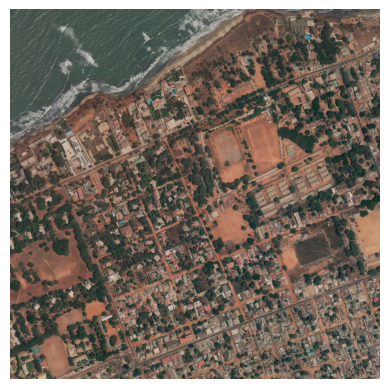

In plot
Crs EPSG:32628
sx_low:  (318505.859375, 1489843.75)
dx_high:  (319726.5625, 1491064.453125)


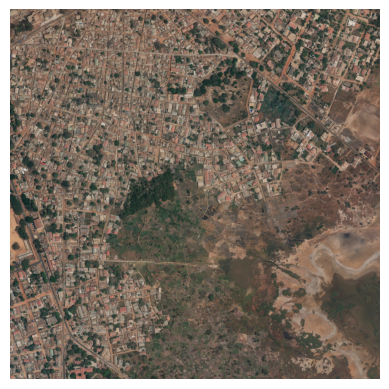

In plot
Crs EPSG:32628
sx_low:  (319726.5625, 1489843.75)
dx_high:  (320947.265625, 1491064.453125)


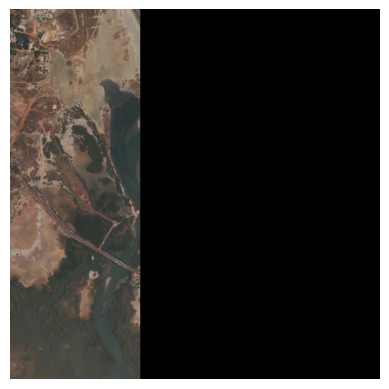

In plot
Crs EPSG:32628
sx_low:  (314843.75, 1491064.453125)
dx_high:  (316064.453125, 1492285.15625)


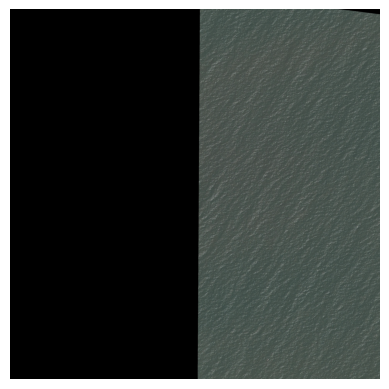

In plot
Crs EPSG:32628
sx_low:  (316064.453125, 1491064.453125)
dx_high:  (317285.15625, 1492285.15625)


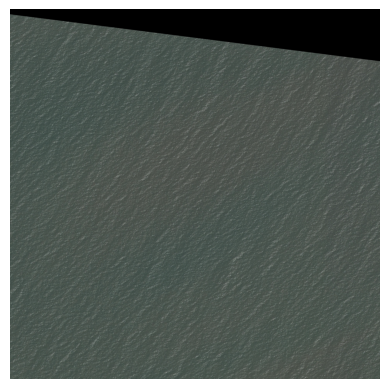

In plot
Crs EPSG:32628
sx_low:  (317285.15625, 1491064.453125)
dx_high:  (318505.859375, 1492285.15625)


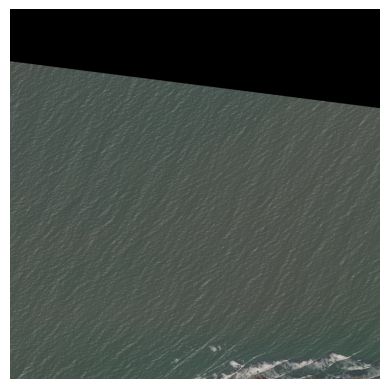

In plot
Crs EPSG:32628
sx_low:  (318505.859375, 1491064.453125)
dx_high:  (319726.5625, 1492285.15625)


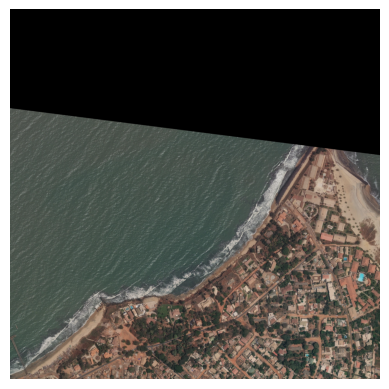

In plot
Crs EPSG:32628
sx_low:  (319726.5625, 1491064.453125)
dx_high:  (320947.265625, 1492285.15625)


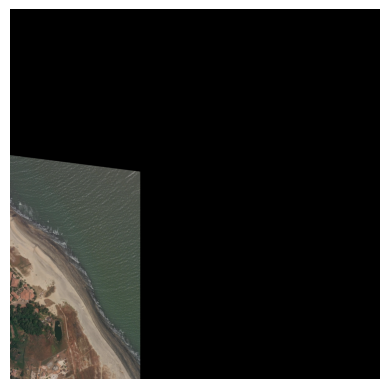

In plot
Crs EPSG:32628
sx_low:  (314843.75, 1492285.15625)
dx_high:  (316064.453125, 1493505.859375)


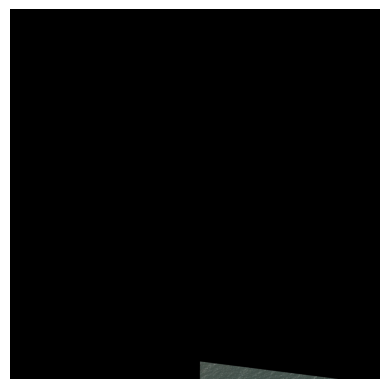

In [5]:
for batch in dataloader:
    sample = unbind_samples(batch)[0]
    dataset.plot(sample)
    plt.axis("off")
    plt.show()

## Maxar Intersection Dataset

Create the intersection dataset

In [6]:
child_pre = "10300100CFC9A500"
child_post = "104001007C806A00"
#preDs = Maxar(os.path.join(pre_root, child_pre, '033133031213.tif'))
preDs = Maxar(os.path.join(pre_root, child_pre))
#preDs = Maxar('/mnt/data2/vaschetti_data/maxar/Emilia-Romagna-Italy-flooding-may23/pre')
print(preDs)
#postDs = Maxar(os.path.join(pre_root, child_pre, '033133031302.tif'))
postDs = Maxar(os.path.join(post_root, child_post))
#postDs = Maxar('/mnt/data2/vaschetti_data/maxar/Emilia-Romagna-Italy-flooding-may23/post')
print(postDs)

Maxar Dataset
    type: GeoDataset
    bbox: BoundingBox(minx=314843.75, maxx=335156.25, miny=1469843.75, maxy=1495156.25, mint=0.0, maxt=9.223372036854776e+18)
    size: 18
Maxar Dataset
    type: GeoDataset
    bbox: BoundingBox(minx=309843.75, maxx=330156.25, miny=1469843.75, maxy=1495156.25, mint=0.0, maxt=9.223372036854776e+18)
    size: 20


In [7]:
from myGeoDatasets import MaxarIntersectionDataset

intersectDs = MaxarIntersectionDataset(preDs, postDs)
print(intersectDs)

In merge
hit1:  /mnt/data2/vaschetti_data/maxar/Gambia-flooding-8-11-2022/pre/10300100CFC9A500/033133031320.tif
hit2:  /mnt/data2/vaschetti_data/maxar/Gambia-flooding-8-11-2022/post/104001007C806A00/033133031233.tif
In merge
hit1:  /mnt/data2/vaschetti_data/maxar/Gambia-flooding-8-11-2022/pre/10300100CFC9A500/033133031320.tif
hit2:  /mnt/data2/vaschetti_data/maxar/Gambia-flooding-8-11-2022/post/104001007C806A00/033133031321.tif
In merge
hit1:  /mnt/data2/vaschetti_data/maxar/Gambia-flooding-8-11-2022/pre/10300100CFC9A500/033133031320.tif
hit2:  /mnt/data2/vaschetti_data/maxar/Gambia-flooding-8-11-2022/post/104001007C806A00/033133031323.tif
In merge
hit1:  /mnt/data2/vaschetti_data/maxar/Gambia-flooding-8-11-2022/pre/10300100CFC9A500/033133031320.tif
hit2:  /mnt/data2/vaschetti_data/maxar/Gambia-flooding-8-11-2022/post/104001007C806A00/033133031322.tif
In merge
hit1:  /mnt/data2/vaschetti_data/maxar/Gambia-flooding-8-11-2022/pre/10300100CFC9A500/033133031320.tif
hit2:  /mnt/data2/vasche

### Test MyIntersectionRandomGeoSampler

In sampler
tile_polyg1 POLYGON ((315457.45849609375 1490156.25, 320156.25 1490156.25, 320156.25 1484843.75, 315425.4150390625 1484843.75, 315457.45849609375 1490156.25))
tile_polyg2 POLYGON ((320156.25 1490156.25, 320156.25 1484843.75, 314843.75 1484843.75, 314843.75 1490132.0043253559, 314849.47218995413 1490156.25, 320156.25 1490156.25))

317007.4749698688 1486173.8843297644 	 317465.2386417438 1486631.6480016394


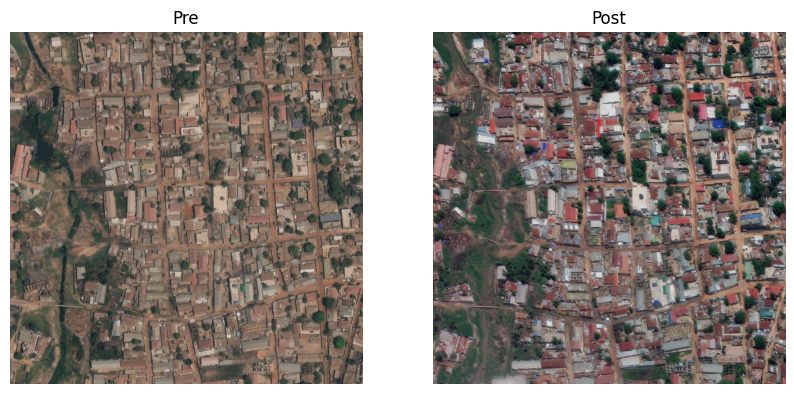

In [8]:
from mySamplers import MyIntersectionRandomGeoSampler

sampler = MyIntersectionRandomGeoSampler(intersectDs, size=1500, length = 1)
dataloader = DataLoader(intersectDs, sampler=sampler, collate_fn=stack_samples)

for batch in dataloader:
    sample = unbind_samples(batch)[0]
    print(sample['bbox'].minx, sample['bbox'].miny, '\t', sample['bbox'].maxx, sample['bbox'].maxy)
    intersectDs.plot(sample)

### Test MyIntersectionGridGeoSampler

In [9]:
# Define a small intersection dataset
child_pre = "10300100CFC9A500"
child_post = "104001007C806A00"
preDs = Maxar(os.path.join(pre_root, child_pre, '033133031213.tif'))
#preDs = Maxar(os.path.join(pre_root, child_pre))
print(preDs)
postDs = Maxar(os.path.join(pre_root, child_pre, '033133031302.tif'))
#postDs = Maxar(os.path.join(post_root, child_post))
print(postDs)
print()
intersectDs = MaxarIntersectionDataset(preDs, postDs)
print(intersectDs)

Maxar Dataset
    type: GeoDataset
    bbox: BoundingBox(minx=314843.75, maxx=320156.25, miny=1489843.75, maxy=1495156.25, mint=0.0, maxt=9.223372036854776e+18)
    size: 1
Maxar Dataset
    type: GeoDataset
    bbox: BoundingBox(minx=319843.75, maxx=325156.25, miny=1489843.75, maxy=1495156.25, mint=0.0, maxt=9.223372036854776e+18)
    size: 1

In merge
hit1:  /mnt/data2/vaschetti_data/maxar/Gambia-flooding-8-11-2022/pre/10300100CFC9A500/033133031213.tif
hit2:  /mnt/data2/vaschetti_data/maxar/Gambia-flooding-8-11-2022/pre/10300100CFC9A500/033133031302.tif
MaxarIntersectionDataset Dataset
    type: IntersectionDataset
    bbox: BoundingBox(minx=319843.75, maxx=320156.25, miny=1489843.75, maxy=1495156.25, mint=0.0, maxt=9.223372036854776e+18)
    size: 1


In [ ]:
from mySamplers import MyIntersectionGridGeoSampler

sampler = MyIntersectionGridGeoSampler(intersectDs, size=600, stride = 600)
dataloader = DataLoader(intersectDs, sampler=sampler, collate_fn=stack_samples)

for batch in dataloader:
    sample = unbind_samples(batch)[0]
    print(sample['bbox'].minx, sample['bbox'].miny, '\t', sample['bbox'].maxx, sample['bbox'].maxy)
    intersectDs.plot(sample)